In [1]:
import sys
sys.path.append('..')

import input_process
import pickle
import numpy as np
import numba
import time
import os

(480, 640)
(100, 700)


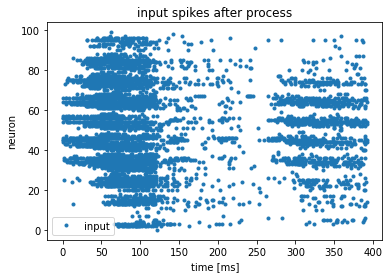

In [101]:
path = '../Experiment_Data/taps_trial_0_pose_0_events_on'
with open(path, 'rb') as file:
    data = pickle.load(file)
    print(data.shape)

data = input_process.clip_pretime(data, 700)

array = input_process.crop(data, 700).astype(np.int64)
input_process.plot_input(array)

In [15]:
path = '../Experiment_Data/taps_trial_0_pose_5_events_on'
with open(path, 'rb') as file:
    data = pickle.load(file)
    print(data.shape)

data_1 = input_process.clip_pretime(data, path, pretime=220, postime=870)

array_1 = input_process.crop(data, 650, 220, 140, 419, 339)

(480, 640)
(100, 650)


In [16]:
array == array_1

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

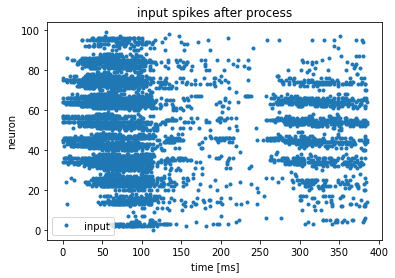

In [100]:
path = '../Experiment_Data/trial_0_pose_0.npy'
with open(path, 'rb') as f:
    f = np.load(f)
input_process.plot_input(f)

In [104]:
os.cpu_count()

20

In [20]:
def find_clip_time(a):
    flag1 = 0
    flag2 = 0
    pretime = 0
    postime = 700
    for t_step in range(120, 1300):
        sum1 = 0
        sum2 = 0
        for iy in range(a.shape[1]):
            for ix in range(a.shape[0]):
                for t in a[ix, iy]:
                    if t == t_step:
                        sum1 += 1
                    if t == 1300 - t_step + 120:
                        sum2 += 1
        if sum1 >= 3 and flag1 == 0:
            pretime = t_step
            # print('pretime: ', pretime)
            flag1 = 1
        if sum2 >= 3 and flag2 == 0:
            postime = 1300 - t_step + 120
            # print('postime: ', postime)
            flag2 = 1
        if flag1 == 1 and flag2 == 1:
            break
    
    if postime - pretime > 670:
        pretime = postime - 610

    print('pretime: ', pretime)
    print('postime: ', postime)
    # print(pretime, postime)
    return pretime, postime 

In [24]:
data_path = 'F:/Files/PhD/Braille/Code/Events_Examples/Experiment_Data'
file_name = 'taps_trial_49_pose_214_events_on'
with open(data_path + '/' + file_name, 'rb') as file:
    data = pickle.load(file)
start = time.perf_counter()
find_clip_time(data[220:420, 140:340])
print(time.perf_counter()-start)

pretime:  619
postime:  1239
0.30501070000036634
